In [3]:
import numpy as np
import matplotlib.pyplot as plt

# SDE

For equation

$$
d u=f(u, p, t) d t+g(u, p, t) d W
$$

where $f(u, p, t)=\alpha u$ and $g(u, p, t)=\beta u$. 

According to Stochastic Calculus, the solution of this equation is 

$$
u\left(t, W_{ t }\right)=u_{0} \exp \left(\left(\alpha-\frac{\beta^{2}}{2}\right) t+\beta W_{ t }\right)
$$

In [99]:
dt = 0.01
dt_sqrt = np.sqrt(dt)
ts = np.arange(0, 5., dt)
dW = np.random.randn(len(ts))

u0, alpha, beta = 0.5, 1., 1.

In [105]:
def euler():
    us = [u0]
    for i in range(1, len(ts)):
        u = us[i-1] + alpha * us[i-1] * dt + dW[i-1] * beta * us[i-1] * dt_sqrt
        us.append(u)
    return us

In [109]:
def exp_euler():
    us = [u0]
    for i in range(1, len(ts)):
        df = alpha * us[i-1]
        dg = dW[i-1] * beta * us[i-1] * dt_sqrt
        exp = np.exp(alpha * dt)
        u = exp * (us[i-1] + dg)
        us.append(u)
    return us

Text(0.5, 0, 'Time (ms)')

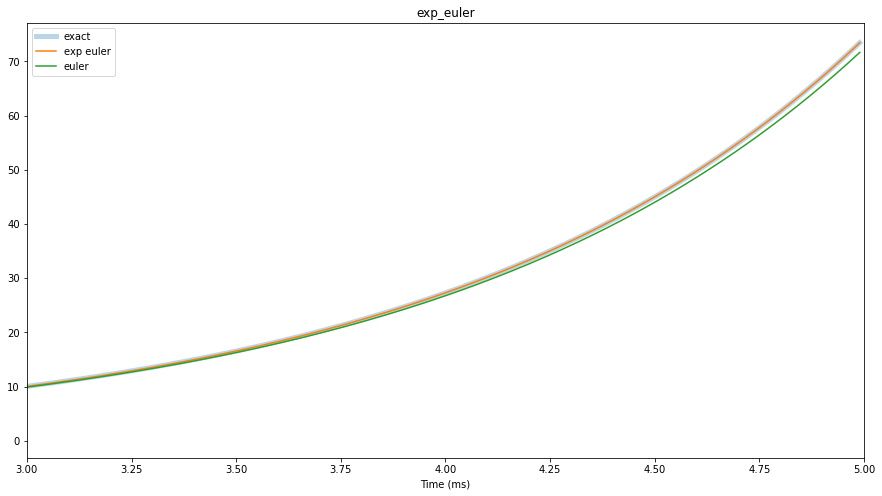

In [115]:
plt.figure(figsize=(15, 8))

Ws = np.cumsum(dW)
exact = u0 * np.exp((alpha - beta ** 2 / 2) * ts + beta * dW)
plt.plot(ts, exp_euler_res, lw=5, alpha=0.3, label='exact')

exp_euler_res = exp_euler()
plt.plot(ts, exp_euler_res, label='exp euler')

euler_res = euler()
plt.plot(ts, euler_res, label='euler')

plt.legend()
plt.xlim((3, 5))
plt.title('exp_euler')
plt.xlabel('Time (ms)')

# ODE

## linear ODE

$$
{dy \over dt} = a y + b
$$

$$
y(t) = {-b + \exp(a*(C1 + t)) \over a}
$$

In [4]:
y0, a, b = 0.5, -4., 5 

In [9]:
def exact():
    ys = [y0]
    ts = np.arange(0, 10., 0.1)
    ys = (-b + np.exp(a * (-np.log(3)/4 + ts))) / a
    return ts, ys

In [5]:
def ode_euler(dt):
    ys = [y0]
    ts = np.arange(0, 10., dt)
    for i in range(len(ts)-1):
        y = ys[i] + (a * ys[i] + b) * dt
        ys.append(y)
    return ts, ys

In [6]:
def ode_exp_euler(dt):
    ys = [y0]
    ts = np.arange(0, 10., dt)
    for i in range(len(ts) - 1):
        dy = a * ys[i] + b
        y = ys[i] + (np.exp(a * dt) - 1) / a * dy
        ys.append(y)
    return ts, ys

In [7]:
def ode_exp_euler2(dt):
    ys = [y0]
    ts = np.arange(0, 10., dt)
    for i in range(len(ts) - 1):
        exp = np.exp(a * dt)
        y = ys[i] * exp - b/a*(1 - exp)
        ys.append(y)
    return ts, ys

Text(0.5, 0, 'Time (ms)')

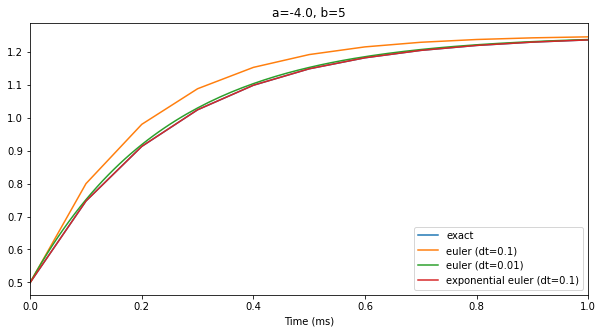

In [16]:
plt.figure(figsize=(10, 5))

ts, ode_r1 = exact()
plt.plot(ts, ode_r1, label='exact')

ts, ode_r1 = ode_euler(0.1)
plt.plot(ts, ode_r1, label='euler (dt=0.1)')

ts, ode_r1 = ode_euler(0.01)
plt.plot(ts, ode_r1, label='euler (dt=0.01)')

ts, ode_r2 = ode_exp_euler(0.1)
plt.plot(ts, ode_r2, label='exponential euler (dt=0.1)')

plt.legend(loc="lower right")
plt.xlim((0, 1))
plt.title(f'a={a}, b={b}')
plt.xlabel('Time (ms)')

## Nonlinear ODE

$$
{dy \over dt} = a y^2 + b y + c
$$

In [69]:
y0, a, b, c = 0.5, -1, 10, 6

In [78]:
def nonl_ode_euler(dt):
    ys = [y0]
    ts = np.arange(0, 5, dt)
    for i in range(len(ts)-1):
        y = ys[i] + (a * ys[i] **2 + b * ys[i] + c) * dt
        ys.append(y)
    return ts, ys

In [79]:
def nonl_ode_exp_euler(dt):
    ys = [y0]
    ts = np.arange(0, 5, dt)
    for i in range(len(ts) - 1):
        dy = a * ys[i] **2 + b * ys[i] + c
        y = ys[i] + (np.exp(b * dt) - 1) / b * dy
        ys.append(y)
    return ts, ys

Text(0.5, 0, 'Time (ms)')

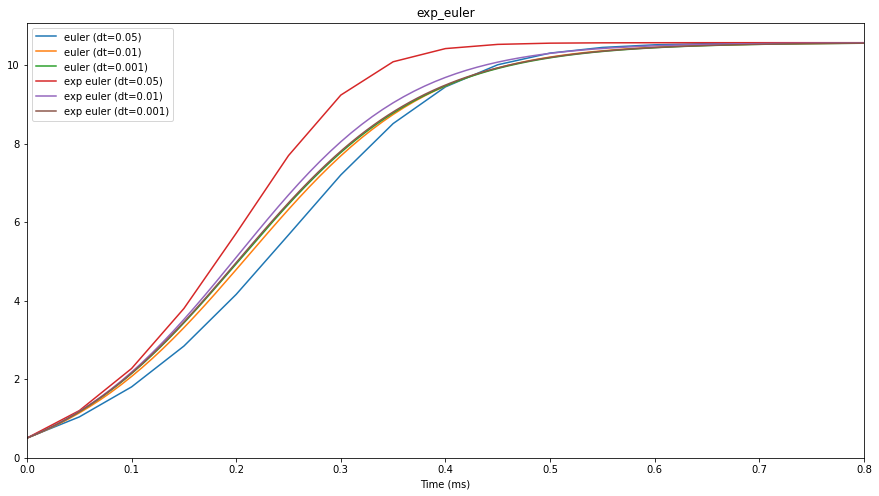

In [85]:
plt.figure(figsize=(15, 8))

ts, ode_r1 = nonl_ode_euler(0.05)
plt.plot(ts, ode_r1, label='euler (dt=0.05)')

ts, ode_r2 = nonl_ode_euler(0.01)
plt.plot(ts, ode_r2, label='euler (dt=0.01)')

ts, ode_r2 = nonl_ode_euler(0.001)
plt.plot(ts, ode_r2, label='euler (dt=0.001)')

ts, ode_r3 = nonl_ode_exp_euler(0.05)
plt.plot(ts, ode_r3, label='exp euler (dt=0.05)')

ts, ode_r3 = nonl_ode_exp_euler(0.01)
plt.plot(ts, ode_r3, label='exp euler (dt=0.01)')

ts, ode_r3 = nonl_ode_exp_euler(0.001)
plt.plot(ts, ode_r3, label='exp euler (dt=0.001)')

plt.legend()
plt.xlim(0, 0.8)
plt.title('exp_euler')
plt.xlabel('Time (ms)')